**Data Science**

**Spring 2025**

*Raya Namazi-Assignment 6*

*Link of the notebook* : https://colab.research.google.com/drive/1YwX--MWvdDmVE0CtpTgAINVboPITwTzQ#scrollTo=oZBHSJpswtpV

---

On this notebook we use Boston House dataset which contains features like crime rate, average number of rooms,lower status percentage, etc to predict the  house value.

### Libraries
First we import libraries we will need later on.

In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

### Loading the Dataset
We load the dataset with sklearn.

In [2]:
from sklearn.datasets import fetch_openml
boston = fetch_openml(name="boston", version=1, as_frame=True)
data = boston.data
target = boston.target

### Getting some insights about the Dataset
Now before EDA and cleaning let's get a sense of the dataset.

Let's see what data each column captures.

1) CRIM: per capita crime rate by town

2) ZN: proportion of residential land zoned for lots over 25,000 sq.ft.

3) INDUS: proportion of non-retail business acres per town

4) CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)

5) NOX: nitric oxides concentration (parts per 10 million)

6) RM: average number of rooms per dwelling

7) AGE: proportion of owner-occupied units built prior to 1940

8) DIS: weighted distances to five Boston employment centres

9) RAD: index of accessibility to radial highways

10) TAX: full-value property-tax rate per $10,000

11) PTRATIO: pupil-teacher ratio by town

12) B: The result of the equation B=1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

13) LSTAT: % lower status of the population





In [3]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


Let's check the type of each column.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
dtypes: category(2), float64(11)
memory usage: 45.1 KB


Since all our features should be numerical, we should convert the categorical values to numericals later.

we can also check the statistical value for each feature and also the target variable

In [5]:
data.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000


In [6]:
target.describe()

,MEDV
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


Let's concatenate the feature data and the target into a new DataFrame to check for relationships between the features and the target variable.

In [7]:
df = pd.concat([data, pd.Series(target, name='MEDV')], axis=1)

### EDA and Cleaning
Let's do some simple analyzing on the data and terget, and clean them up.

We can visualize the relationship between each pair of features.

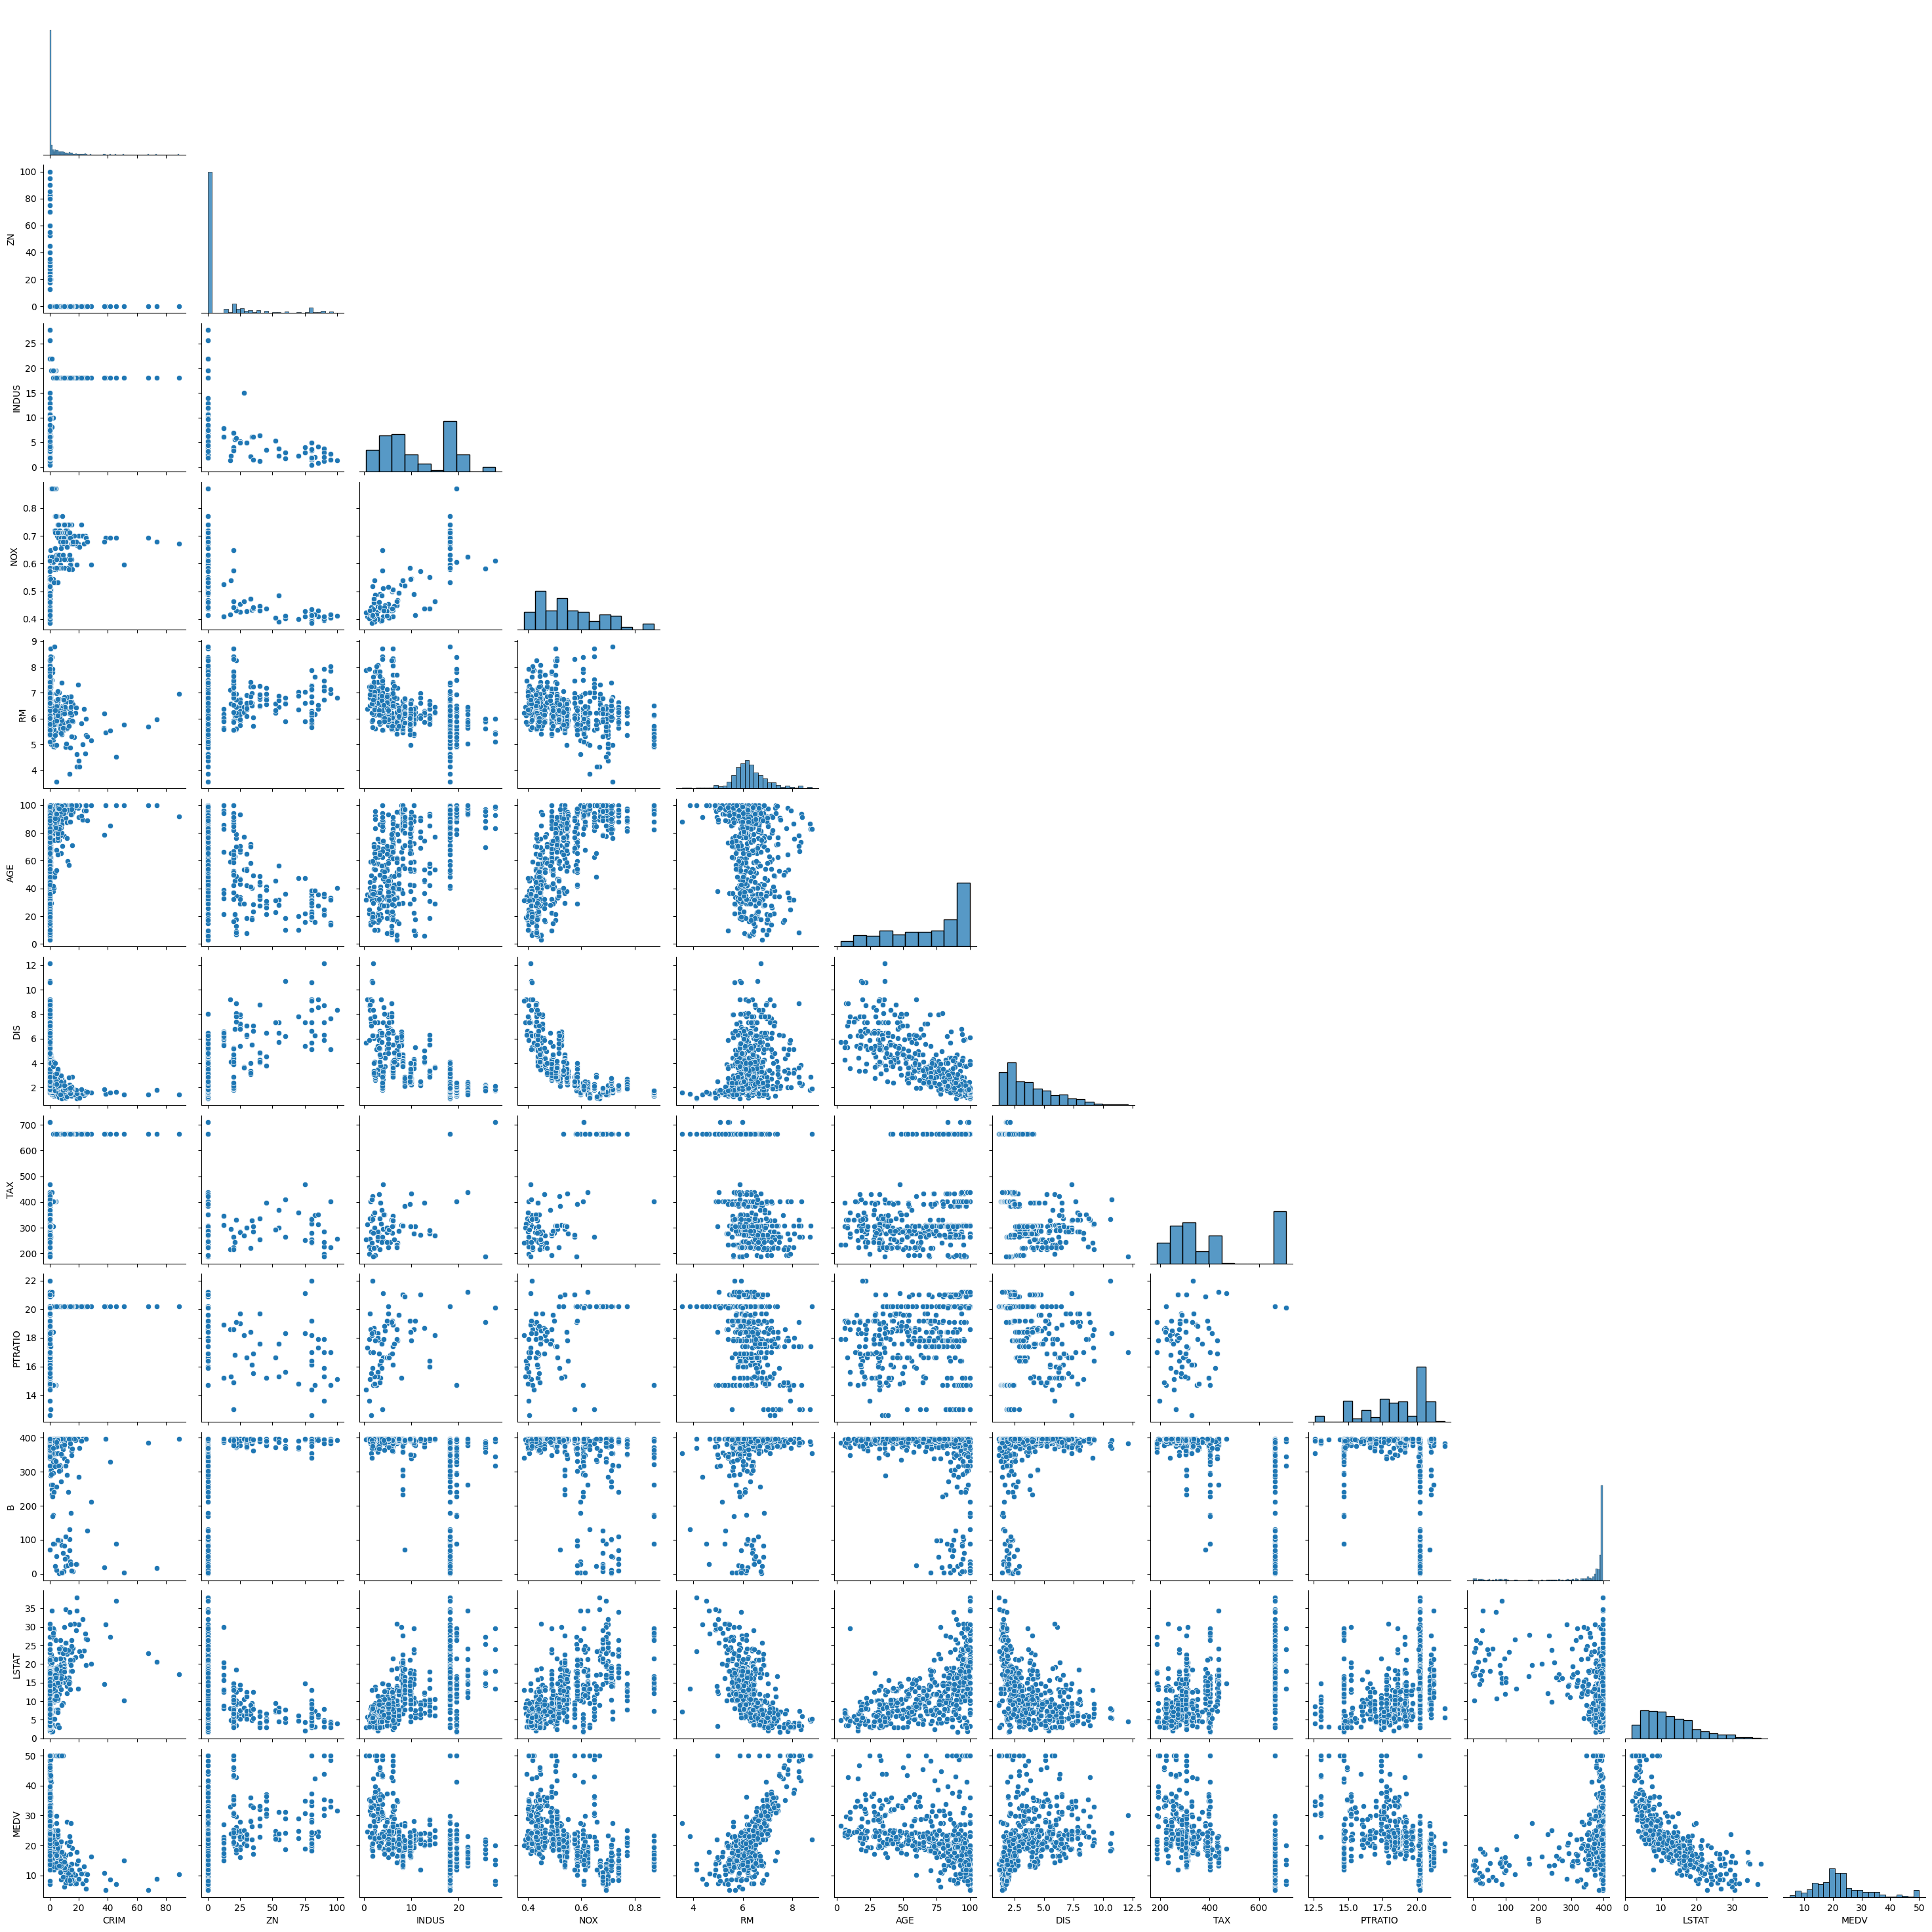

In [8]:
sns.pairplot(df,corner=True)

We can also visualize the distribution of the traget variable.

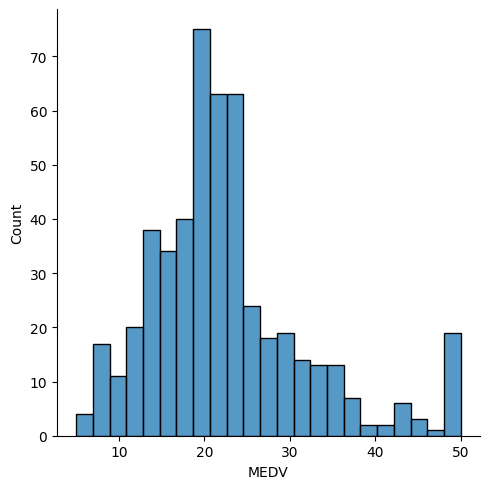

In [9]:
sns.displot(target)

Let's check for missing data.

In [10]:
df.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


Let's check for duplicated data.

In [11]:
df.duplicated().sum()

np.int64(0)

Now as we saw earlier, there is two features with type category. Let's convert them to numerical features.

In [12]:
df['CHAS'] = pd.to_numeric(df['CHAS'])
df['RAD'] = pd.to_numeric(df['RAD'])

Now, let's make sure all features are numerical as intended.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


Let's visualize the relationship between house price and crime rate.

Text(0.5, 1.0, 'Crime rate vs owner-home value')

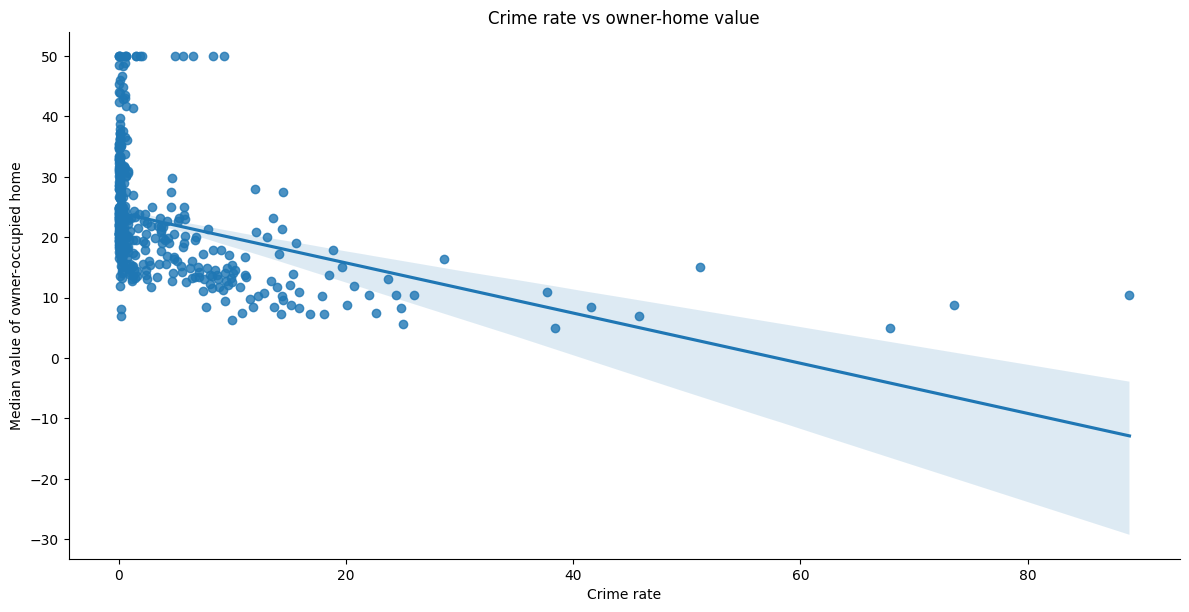

In [14]:
sns.lmplot(x='CRIM',y='MEDV',data=df,aspect=2,height=6)
plt.xlabel('Crime rate')
plt.ylabel('Median value of owner-occupied home')
plt.title('Crime rate vs owner-home value')

It seems like the crime rate tends to decrease as house prices increase.

### Dealing with Outliers
Instead of removing the outliers, we use Winsorization technique to cap the exterme values.
With this method the size of our dataset does not change.
It only replaces outlier values with the nearest non-outlier value.

The first 0.05 caps the bottom 5% of values. Any value below the 5th percentile is set to the 5th percentile.

The second 0.05 caps the top 5% of values. Any value above the 95th percentile is set to the 95th percentile.

In [15]:
from scipy.stats import mstats
target = mstats.winsorize(target, limits=[0.05, 0.05])

Now we can visualize the distribution of the traget again.

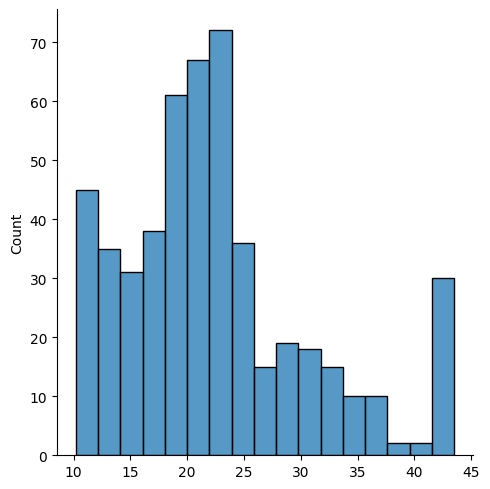

In [16]:
sns.displot(target)

We can see that the distribution has improved significantly.

### Normalization
Our next step is to normalize the features so they have similar ranges.

First, let's check the distribution of the continuous columns.


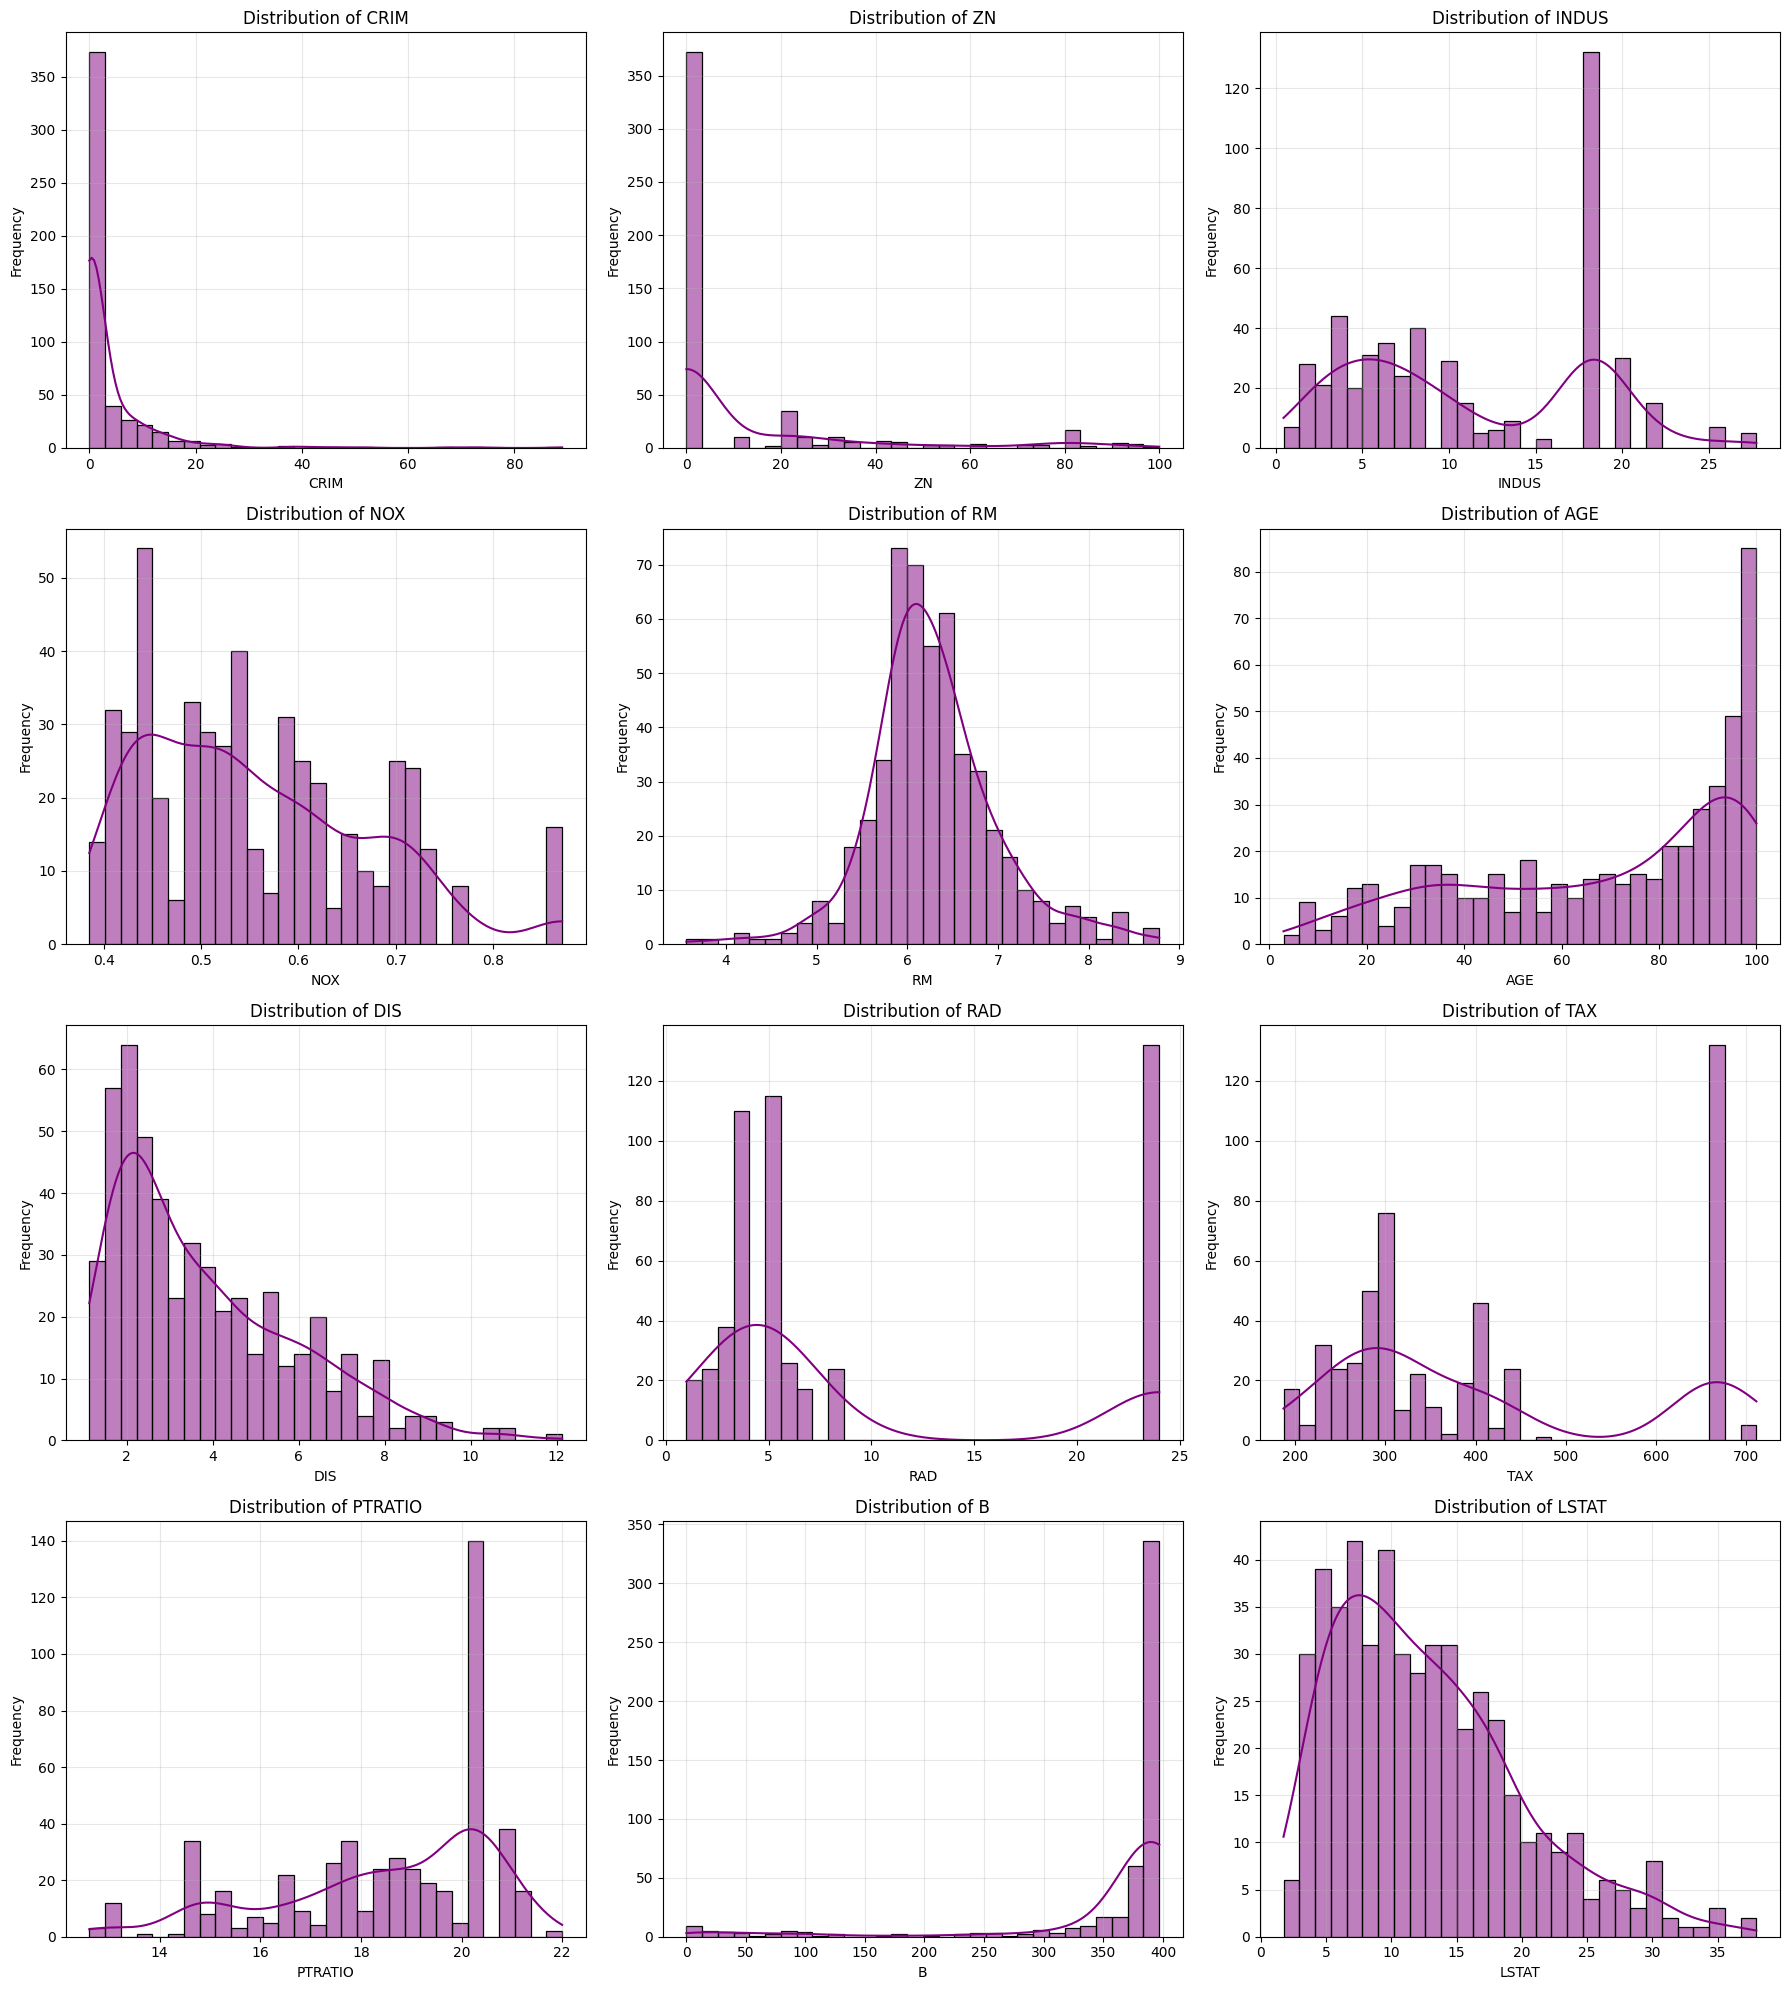

In [17]:
features = ['CRIM', 'ZN', 'INDUS', 'NOX','RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO','B', 'LSTAT',]

plt.figure(figsize=(18, 20))
for i, feature in enumerate(features, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[feature], kde=True, color='purple', bins=30)
    plt.title(f'Distribution of {feature}', fontsize=12)
    plt.xlabel(feature, fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
    plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

Since some regression algorithms assumes that features are normally distributed, Let's apply log transformation on skewed distributed features to normalize them.

In [18]:
skewed_features = ['CRIM','ZN','AGE','INDUS','NOX', 'DIS', 'RAD','PTRATIO', 'TAX',  'LSTAT']
for feature in skewed_features:
    df[feature] = np.log1p(df[feature])

Now let's see the distribution of transformed features.

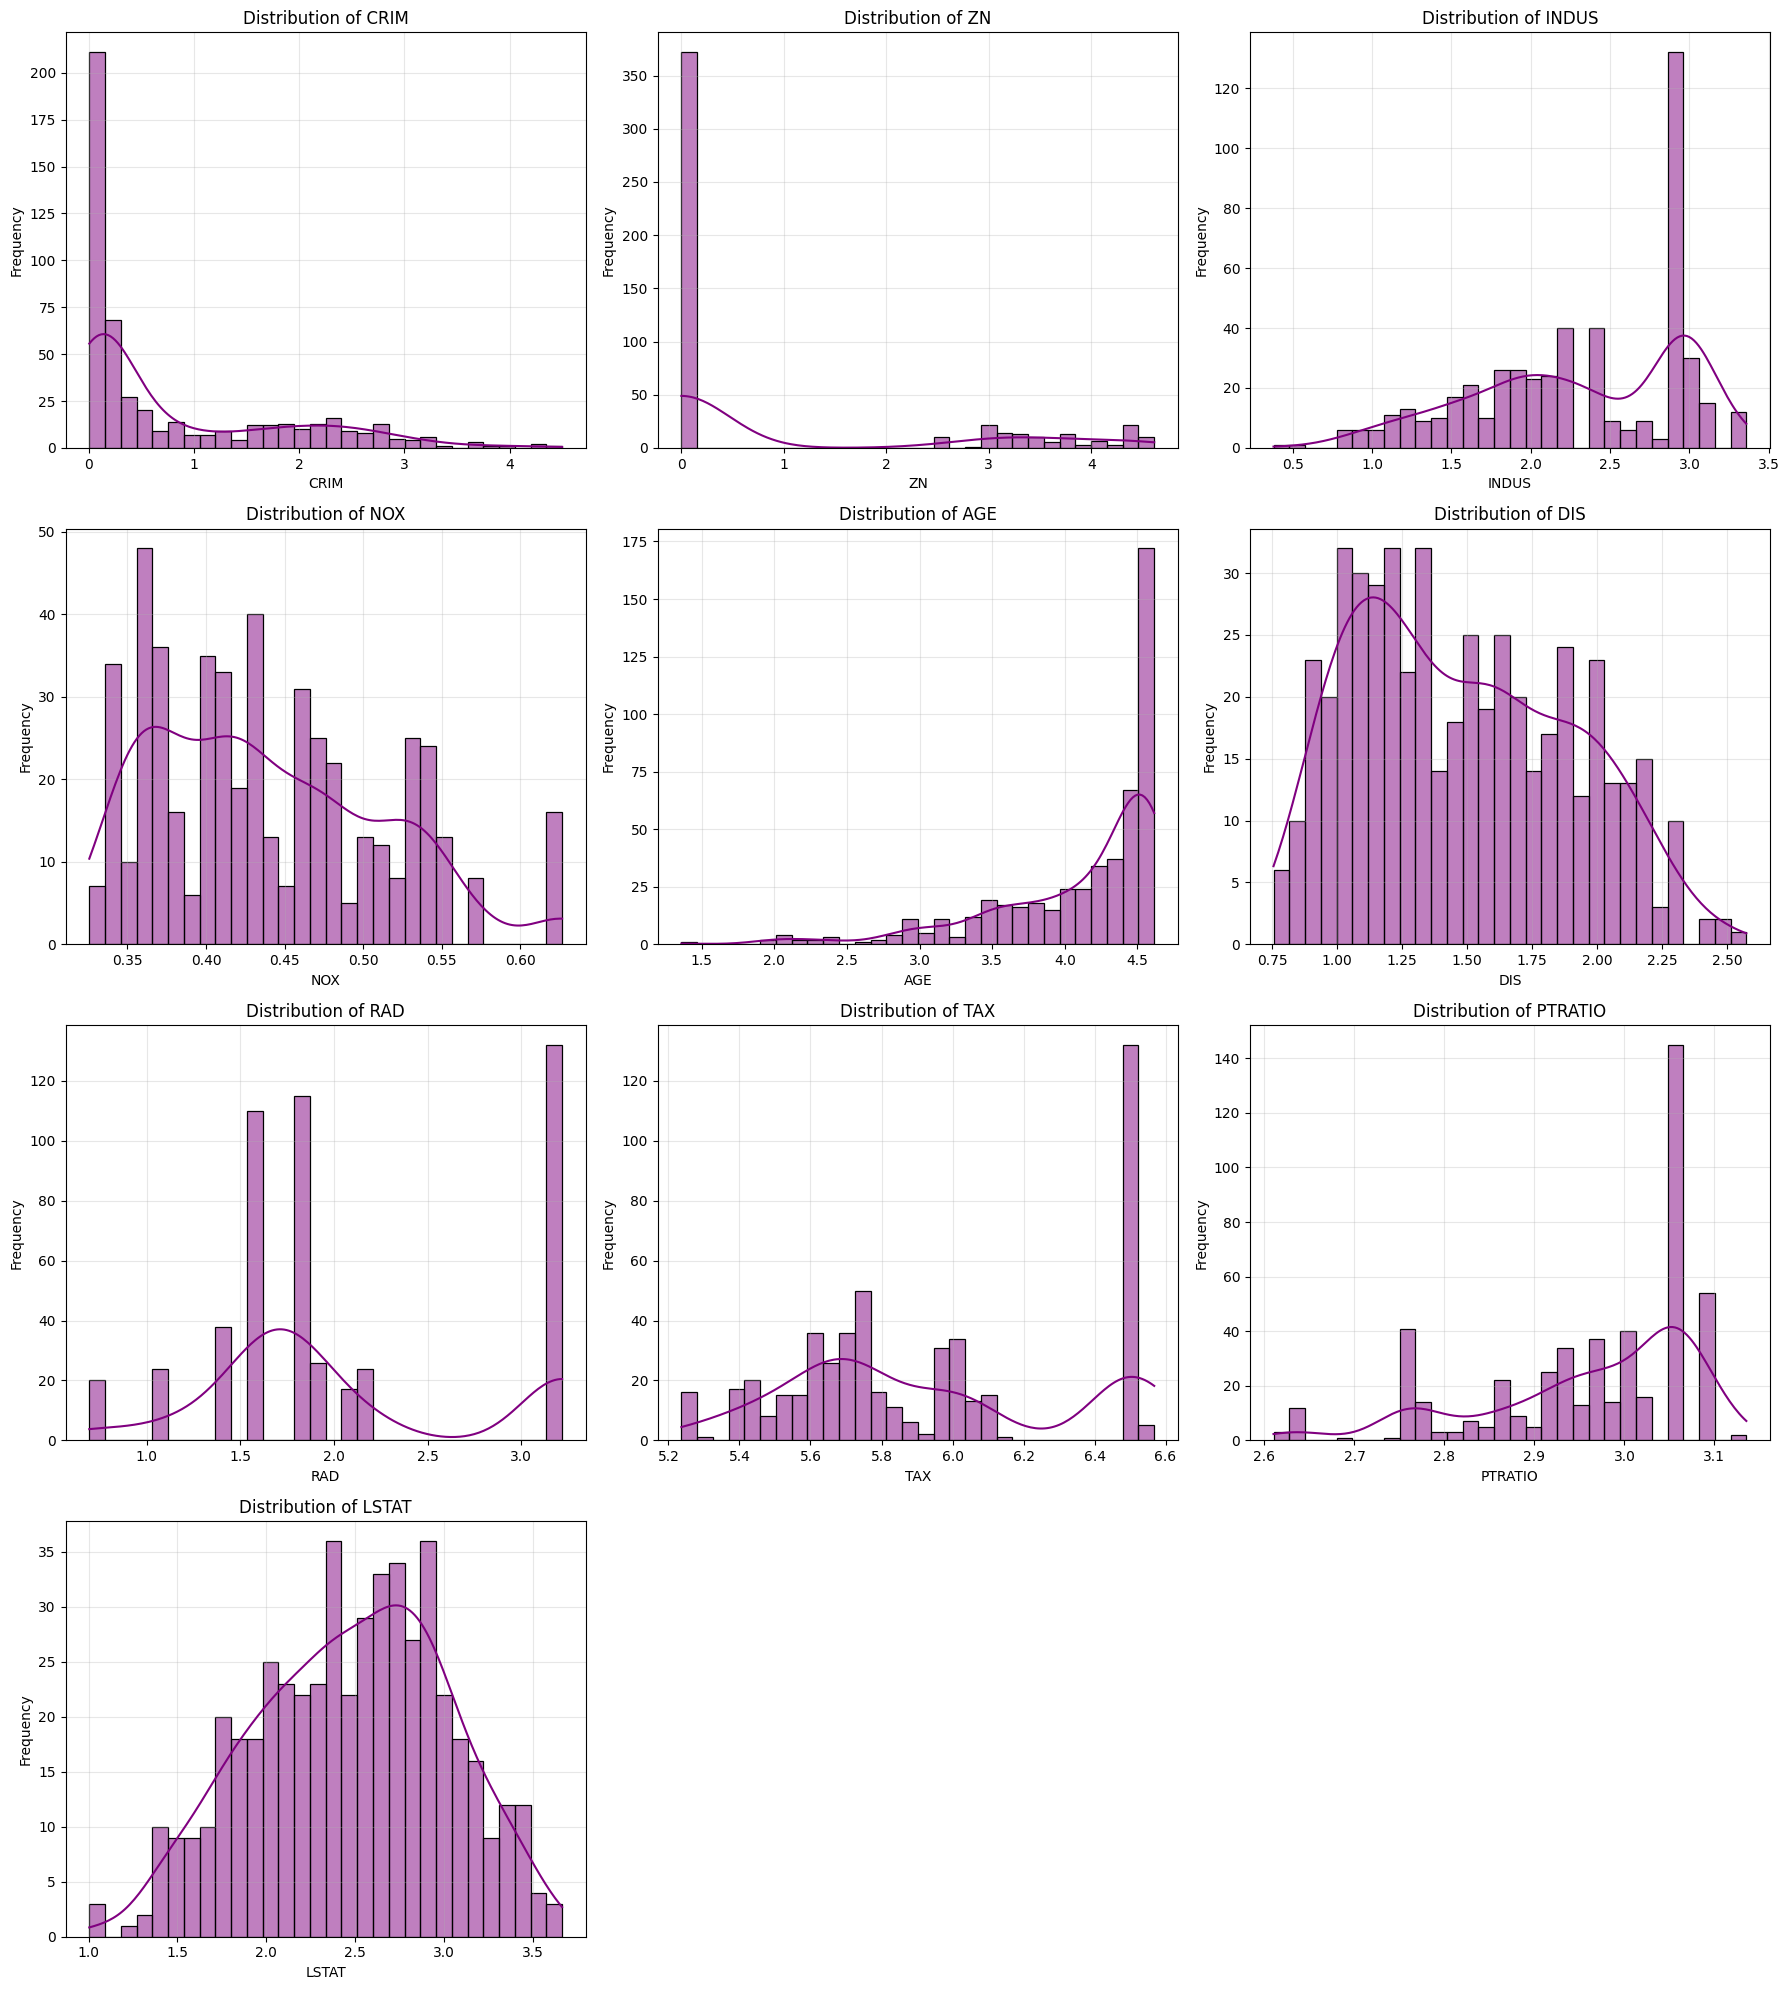

In [19]:
features = ['CRIM', 'ZN', 'INDUS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']
plt.figure(figsize=(18, 20))
for i, feature in enumerate(features, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[feature], kde=True, color='purple', bins=30)
    plt.title(f'Distribution of {feature}', fontsize=12)
    plt.xlabel(feature, fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
    plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

### Aggregation
Now It's time to create new features by aggregation for getting better accuracy on our predictions.

We can use aggregation on two columns to create more meaningful features and potentially improve our results.  
For example, crime rates in areas far from job centers might increase, which could negatively impact house values.

Let's test this assumption.

Text(0.5, 1.0, 'Crime rate vs owner-home value')

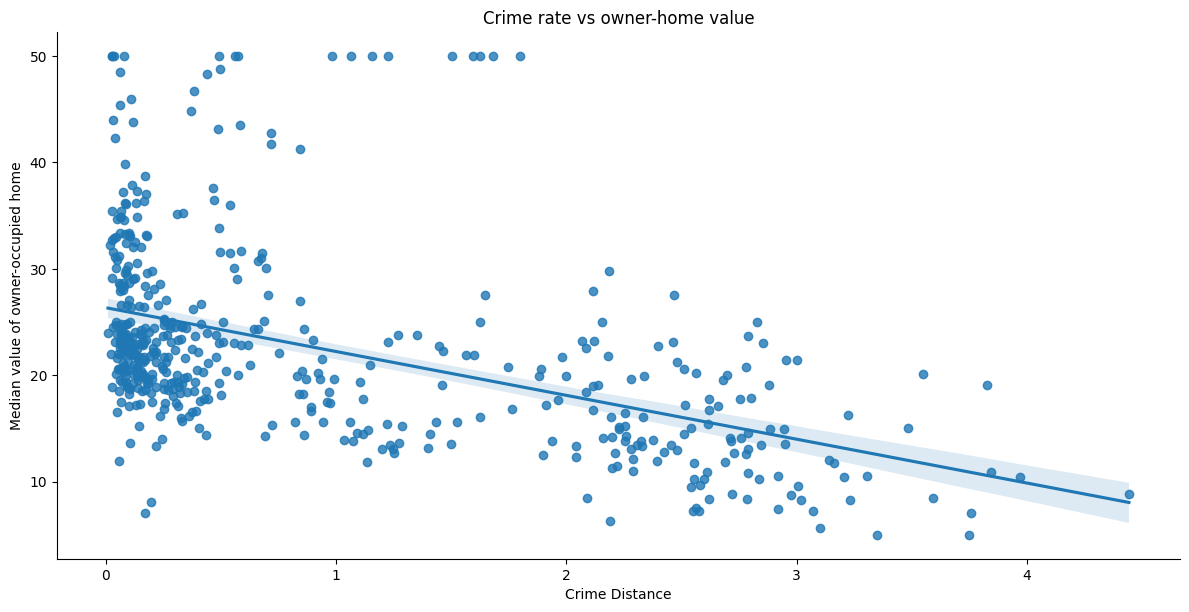

In [20]:
df['CRIME_DIS'] = df['CRIM'] * df['DIS']
sns.lmplot(x='CRIME_DIS',y='MEDV',data=df,aspect=2,height=6)
plt.xlabel('Crime Distance')
plt.ylabel('Median value of owner-occupied home')
plt.title('Crime rate vs owner-home value')

The CRIME_DIS feature has almost a linear relationship with the target so we keep this feature for now.

A house with lots of rooms might be worth more in an area where there aren’t as many lower-income residents, because that suggests a wealthier neighborhood where large homes are desired. On the other hand, in areas with a high percentage of lower-income residents, having many rooms might not boost the house’s value as much, since the overall area might be less appealing.

Text(0.5, 1.0, 'Average room_Lower Status Percentage vs owner-home value')

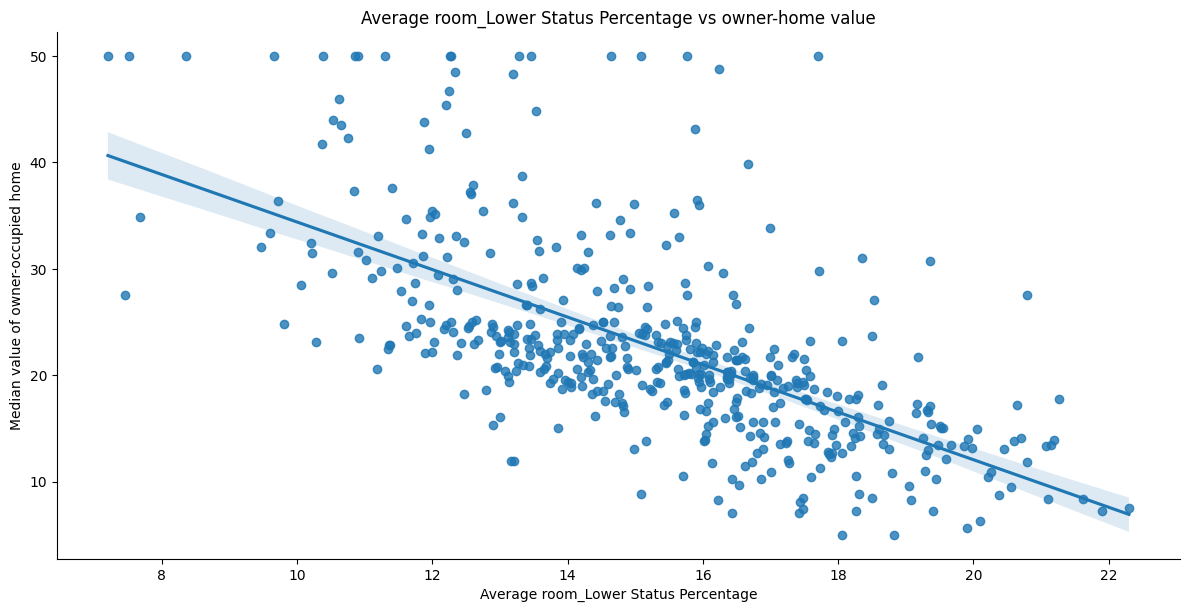

In [21]:
df['RM_LSTAT'] = df['RM'] * df['LSTAT']
sns.lmplot(x='RM_LSTAT',y='MEDV',data=df,aspect=2,height=6)
plt.xlabel('Average room_Lower Status Percentage')
plt.ylabel('Median value of owner-occupied home')
plt.title('Average room_Lower Status Percentage vs owner-home value')

It also seems like this feature has a nice  relationship with the target variable.

Now let's split the dataset into target and feature sets for regression.

In [22]:
X = df.drop('MEDV', axis=1)
# We already have the target variable, so there's no need to extract it again from the DataFrame.

### Standardization
We need to scale our data so all values be within a same range.

For scaling we use RobustScalar which is defained as:

$\
x_{\text{scaled}} = \frac{x - \text{median}(x)}{\text{IQR}(x)}$

As We can see from the formula, it changes the median to 0.
Unlike StandardScalar which uses mean and standard deviation which are sesitive to outliers, it uses median and IQR(the difference between the 75th percentile and the 25th percentile).

In [23]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)


In [24]:
X_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CRIME_DIS,RM_LSTAT
0,-0.151682,1.131306,-1.040477,0.0,0.000000,0.496612,-0.234899,0.275496,-0.682606,-0.124869,-1.461773,0.261902,-0.891172,-0.227092,-1.021653
1,-0.137580,0.000000,-0.249527,0.0,-0.402575,0.287940,0.024371,0.505506,-0.430677,-0.356056,-0.454422,0.261902,-0.243003,-0.202106,-0.164095
2,-0.137593,0.000000,-0.249527,0.0,-0.402575,1.323171,-0.323026,0.505506,-0.430677,-0.356056,-0.454422,0.066675,-1.103520,-0.202129,-1.063514
3,-0.134223,0.000000,-1.076036,0.0,-0.468496,1.069783,-0.712922,0.749279,-0.251930,-0.455007,-0.124302,0.153016,-1.403308,-0.192775,-1.617162
4,-0.110372,0.000000,-1.076036,0.0,-0.468496,1.271680,-0.485377,0.749279,-0.251930,-0.455007,-0.124302,0.261902,-0.821356,-0.147753,-0.628152


### Polynomial Features

As we saw earlier there is also some non-linear relationships between features and the target variable, so it might make the regression process more accurate if we create some polynomial features.

In [25]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_scaled)
X_poly = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(X.columns))

### Preparing Data for regression
Now that we have done all the scaling, it is time to prepare our Dataset. For this we need to spilt our data into tain set and test set.

In [26]:
from sklearn.model_selection import train_test_split
target = pd.Series(target.filled(), name='target')

X_train, X_test, y_train, y_test = train_test_split(X_poly, target, test_size=0.2, random_state=42)

### Linear Regression
Now, we fit our training set to a linear regression model, and then use that model to predict the target values of our test set.

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,accuracy_score
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
lr_r2 = r2_score(y_test, y_pred_lr)
print(f"Linear Regression R² Score: {lr_r2:.4f}")

Linear Regression R² Score: 0.8586


### Feature Selection
After feature engineering, the dataset becomes high-dimensional, so when we use linear regression it tries to find the optimized coefficients with minimum MSE. However, since there might be some irrelevant features, we need to reduce the dimensionality of the dataset by choosing the best subset of features. This also helps to avoid overfitting by dropping irrelevant features and making the regression model more general.

In [28]:
from sklearn.linear_model import  Lasso
lasso_selector = Lasso(alpha=0.01, max_iter=10000)
lasso_selector.fit(X_poly, target)
important_features = X_poly.columns[lasso_selector.coef_ != 0]
X_selected = X_poly[important_features]

### Improved Linear Regression
Let's apply linear regression again to see whether the predictions have improved.

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, target, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
lr_r2 = r2_score(y_test, y_pred_lr)
print(f"Linear Regression R² Score: {lr_r2:.4f}")

Linear Regression R² Score: 0.8608


As we can see, the prediction has slightly improved by reducing the dimensionality and dropping irrelevant features.

### Ridge Regression
Now it is time to apply Ridge Regression on the Dataset.
It finds ti coefficients by minimizing the cost function which is defined as:

$\text{Cost} = \sum_{i=1}^n (y_i - \hat{y}_i)^2 + \alpha \sum_{j=1}^p \beta_j^2$

Unlike Linear Regression, Ridge regression also adds regularization, which helps to prevent overfitting by penalizing large coefficients.

In [30]:
from sklearn.linear_model import Ridge
ridge = Ridge()
model = Ridge(alpha=0.1)
model.fit(X_train, y_train)
y_pred_ridge = model.predict(X_test)
ridge_r2 = r2_score(y_test, y_pred_ridge)
print(f"Ridge Regression R² Score: {ridge_r2}")

Ridge Regression R² Score: 0.8603100057321035


### Lasso Regression
Now we apply Lasso regression.
Unlike Ridge Regression, Lasso Regression Uses L1 regularization, which adds the sum of the absolute values of the coefficients to the cost function.


We need to find the best alpha value for Lasso regression, so let's plot the relationship between R2 score ad alpha parameter to find the best parameter.

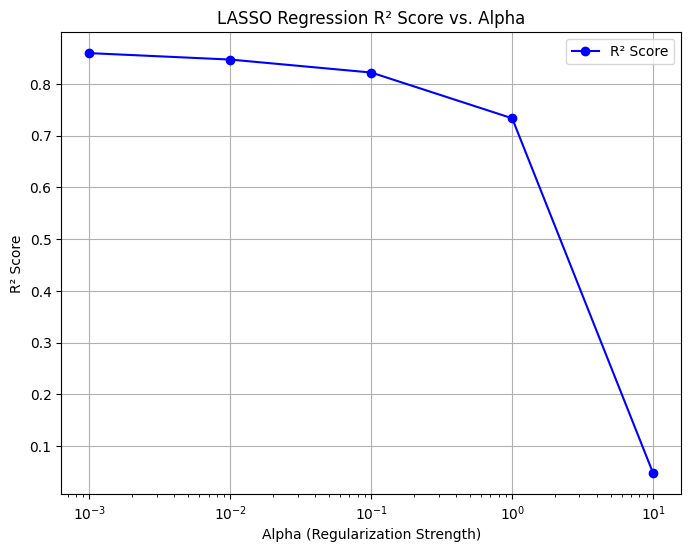

In [31]:
from sklearn.linear_model import Lasso

alpha_values = [0.001, 0.01, 0.1, 1, 10]
r2_scores = []

for alpha in alpha_values:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_train, y_train)
    y_pred_lasso = lasso.predict(X_test)
    lasso_r2 = r2_score(y_test, y_pred_lasso)
    r2_scores.append(lasso_r2)


plt.figure(figsize=(8, 6))
plt.plot(alpha_values, r2_scores, marker='o', linestyle='-', color='b', label='R² Score')
plt.xscale('log')  # we use log transformation since our alpha parameters have different orders of magnitude
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('R² Score')
plt.title('LASSO Regression R² Score vs. Alpha')
plt.grid(True)
plt.legend()
plt.show()

As we can see above the best alpha for Lasso regression is 0.001.Let's train the model with this parameter.

In [32]:
best_lasso = Lasso(alpha=0.001, max_iter=10000)
best_lasso.fit(X_train, y_train)
y_pred_lasso = best_lasso.predict(X_test)
lasso_r2 = r2_score(y_test, y_pred_lasso)
print(f"LASSO Regression R² Score: {lasso_r2:.4f}")

LASSO Regression R² Score: 0.8593


### Kernel Regression
Kernel Ridge Regression combines Ridge Regression with the Kernel trick to capture non-linear relationships between features and the target variable.
In this Kernel Regression we use Radial Bias Function kernel.The RBF kernel is effective for capturing non-linear relationships by mapping data into a high-dimensional space.
The model has two hyperparameters. alpha is the regularization strenght(like we found the best one for ridge regression) and gamma controls the width of the RBF kernel.

This thime instead of plotting and finding the best hyperparametrs, we use GridSearch. It gives the best hyperparametrs for the model.
The GridSearchCV has a CV paramter which is the number of cross validations.If we set the CV to 10, it splits the training data into 10 sets, training on 9 sets and validating on 10th one for each combination of alpha and gamma.

It also has a scoring parameter which measures the score in that metric to find the best hyperparameters.

In [33]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV
kernel_reg = KernelRidge(kernel='rbf')
kernel_params = {'alpha': [0.001, 0.01, 0.1, 1], 'gamma': [0.001, 0.01, 0.1, 1]}
kernel_grid = GridSearchCV(kernel_reg, kernel_params, cv=10, scoring='r2')
kernel_grid.fit(X_train, y_train)
best_kernel = kernel_grid.best_estimator_
y_pred_kernel = best_kernel.predict(X_test)
kernel_r2 = r2_score(y_test, y_pred_kernel)
print(f"Kernel Regression R² Score: {kernel_r2}")

Kernel Regression R² Score: 0.8389964753522501


### Logistic Regression

Logistic Regression uses the sigmoid curve which is useful for when the predicted values are between 0 and 1.

Since our target variable type is not integer, we can't apply Logistic regression directly.
So let's convert it to integer type.


In [34]:
target = target.astype(int)

In [35]:
target.head()

,target
0,24
1,21
2,34
3,33
4,36


Since we changed our target we need to split the Dataset again.

In [36]:
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_selected, target, test_size=0.4, random_state=42)

Now we are ready to apply Logistic Regression.
We use GridSearch like we did for Kernel Regression to find the best hyperparameters that reaches the best R2 score.

In [37]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l2', C=1.0, max_iter=10000)
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(Ridge(), param_grid, cv=5, scoring='r2')
grid.fit(X_train_log, y_train_log)
best_model = grid.best_estimator_
print(f"Kernel Regression R² Score: {grid.best_score_:.4f}")

Kernel Regression R² Score: 0.8684


The reason that the logistic regression result reaches a good score is that, in the feature engineering part, the classes for this regression were well-separated making it more accuarate in prediction.

###‌ Explain kernel trick in a few sentences and how it can be helpful in achieving better regression results.



The kernel trick is a technique that  maps input data from lower dimensional space into a higher-dimensional feature space without explicitly carrying the transformation, by replacing the inner products between pairs of data points with a kernel function K(x,y), which makes it easier bacause instead of computing the coordianates of the data in the higher-dimensional space directly, we compute the Kernel function in the original space.
A kernel function measuers the similarity of two data points in the original input space.
By using kernel functions, models can capture complex or non-linear relationships in the data, which makes predictions more accurate, comparing to other simpler techniques like linear regression.